# Part 1 - Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_excel('Arrival_time.xlsx')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Charge_mass        576 non-null    float64
 1   Standoff_distance  576 non-null    int64  
 2   Time_of_arrival    576 non-null    float64
 3   Arrival_index      576 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 18.1 KB


In [3]:
y = dataset['Time_of_arrival']*1000
X = dataset.drop(['Time_of_arrival','Arrival_index'], axis=1)
print(X.shape, y.shape)

(576, 2) (576,)


In [4]:
# convert to numpy array
X = np.array(X)
y = np.array(y)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 0)

In [6]:
X_val, X_test, y_val, y_test = train_test_split(X_test,
                                                y_test,
                                                test_size = 0.5,
                                                random_state = 0)

# Part 2 - Building the ANN

In [7]:
ann = tf.keras.models.Sequential()

In [8]:
ann.add(tf.keras.layers.Dense(units=20,
                              input_shape=(X_train.shape[1],),
                              activation='leaky_relu'))
ann.add(tf.keras.layers.Dense(units=15,
                              activation='leaky_relu'))
ann.add(tf.keras.layers.Dense(units=10,
                              activation='leaky_relu'))

In [9]:
ann.add(tf.keras.layers.Dense(units=1,
                              activation='linear'))

In [10]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                60        
                                                                 
 dense_1 (Dense)             (None, 15)                315       
                                                                 
 dense_2 (Dense)             (None, 10)                160       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 546
Trainable params: 546
Non-trainable params: 0
_________________________________________________________________


# Part 3 - Training the ANN

In [11]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
ann.compile(optimizer = opt,
            loss = 'mean_squared_error',
            metrics = ['mae'])

In [12]:
# protects from unnecessary further training of the model if a particular metric does not continue to improve over a number of n epochs. In such a case, the model training would be automatically aborted.
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)

In [13]:
history = ann.fit(X_train, y_train,
                    validation_data = (X_val, y_val),
                    callbacks=[es],
                    epochs=500,
                    batch_size=30,
                    verbose=1)

Epoch 1/500
14/14 [==============================] - 1s 29ms/step - loss: 1668.9912 - mae: 33.8473 - val_loss: 1927.1316 - val_mae: 36.9448
Epoch 2/500
14/14 [==============================] - 0s 14ms/step - loss: 1448.4591 - mae: 31.1288 - val_loss: 1636.6401 - val_mae: 33.5976
Epoch 3/500
14/14 [==============================] - 0s 7ms/step - loss: 1195.9753 - mae: 27.8348 - val_loss: 1301.3120 - val_mae: 29.7196
Epoch 4/500
14/14 [==============================] - 0s 12ms/step - loss: 894.5479 - mae: 23.7354 - val_loss: 900.2972 - val_mae: 24.6221
Epoch 5/500
14/14 [==============================] - 0s 8ms/step - loss: 572.7495 - mae: 18.8454 - val_loss: 491.8512 - val_mae: 18.3110
Epoch 6/500
14/14 [==============================] - 0s 11ms/step - loss: 300.0273 - mae: 13.9361 - val_loss: 225.3343 - val_mae: 12.4826
Epoch 7/500
14/14 [==============================] - 0s 7ms/step - loss: 157.5965 - mae: 10.5508 - val_loss: 111.2684 - val_mae: 8.8340
Epoch 8/500
14/14 [=============

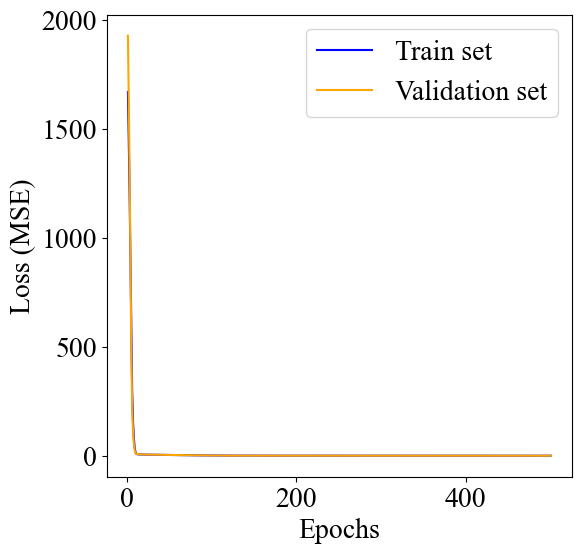

In [14]:
# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)

# Set global font to Times New Roman and font size
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['font.size'] = 20

# Create a plot
plt.figure(figsize=(6, 6))
plt.plot(epochs, loss_values, 'blue', label='Train set')
plt.plot(epochs, val_loss_values, 'orange', label='Validation set')
#plt.title('Training and testing loss')


plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.savefig('Arrival_ANN5_2.png', dpi=200, bbox_inches='tight')
plt.show()

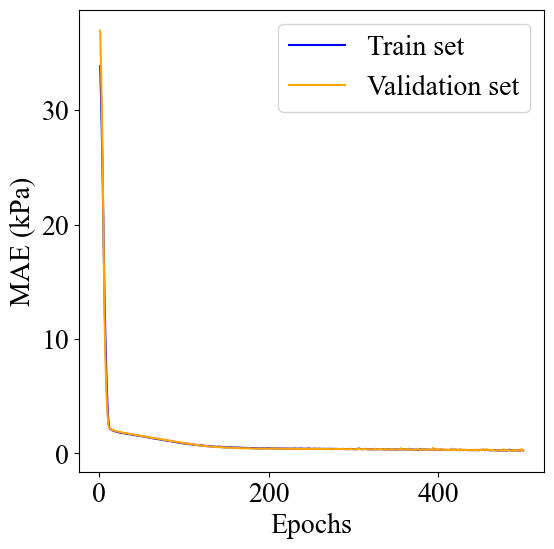

In [15]:
loss_values1 = history_dict['mae'] # you can change this
val_loss_values1 = history_dict['val_mae'] # you can also change this
epochs = range(1, len(loss_values1) + 1) # range of X (no. of epochs)
# Create a plot
plt.figure(figsize=(6, 6))
plt.plot(epochs, loss_values1, 'blue', label='Train set')
plt.plot(epochs, val_loss_values1, 'orange', label='Validation set')
#plt.title('Training and testing MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE (kPa)')
plt.legend()
plt.savefig('Arrival_ANN5_3.png', dpi=200, bbox_inches='tight')
plt.show()

In [16]:
ann.save('Arrival_ANN_5')

INFO:tensorflow:Assets written to: Arrival_ANN_5\assets


# Part 4 - Make predictions

3/3 [==============================] - 0s 3ms/step


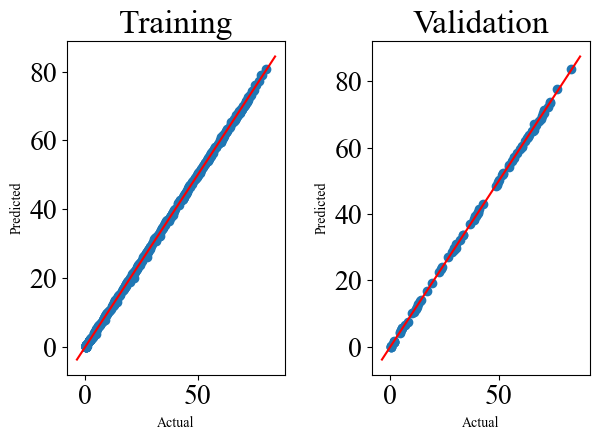

In [17]:
# scatterplot of actual vs. pred
# specify the dimensions 
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=ann.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_val, y=ann.predict(X_val)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()
plt.savefig('Arrival_ANN5_1.png', dpi=200, bbox_inches='tight')
# show the plot
plt.show()

In [18]:
y_pred = ann.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

3/3 [==============================] - 0s 4ms/step
[[48.45 48.85]
 [22.7  22.68]
 [82.19 81.  ]
 [ 1.99  2.16]
 [24.52 25.45]
 [34.86 34.94]
 [63.47 63.62]
 [45.52 45.38]
 [ 1.62  1.72]
 [77.8  77.78]
 [24.82 24.75]
 [35.47 35.81]
 [40.67 40.69]
 [69.56 69.95]
 [73.09 72.15]
 [ 5.84  5.61]
 [33.99 33.88]
 [ 9.26  9.17]
 [74.66 74.46]
 [25.77 25.48]
 [ 2.18  2.31]
 [13.96 15.83]
 [69.94 69.8 ]
 [65.22 65.88]
 [ 8.33 10.21]
 [43.79 43.62]
 [ 0.26  0.25]
 [ 1.55  1.65]
 [59.88 60.36]
 [80.62 79.63]
 [33.17 33.13]
 [21.78 22.06]
 [17.05 17.45]
 [57.48 57.34]
 [ 7.47  7.73]
 [58.63 58.73]
 [49.19 49.39]
 [12.32 12.46]
 [ 7.94  8.  ]
 [18.12 18.76]
 [47.35 47.01]
 [57.71 57.62]
 [30.11 29.97]
 [37.46 37.19]
 [16.43 16.78]
 [17.23 17.31]
 [23.04 22.97]
 [15.76 15.88]
 [32.73 32.94]
 [37.45 37.84]
 [ 4.54  4.6 ]
 [ 1.58  1.7 ]
 [ 0.13  0.27]
 [69.09 68.99]
 [ 7.28  7.63]
 [68.42 69.08]
 [61.85 61.98]
 [60.93 61.21]
 [11.87 12.01]
 [32.94 33.09]
 [ 1.66  1.75]
 [ 8.39  8.41]
 [64.25 64.49]
 [ 0

Text(0, 0.5, 'Predicted data')

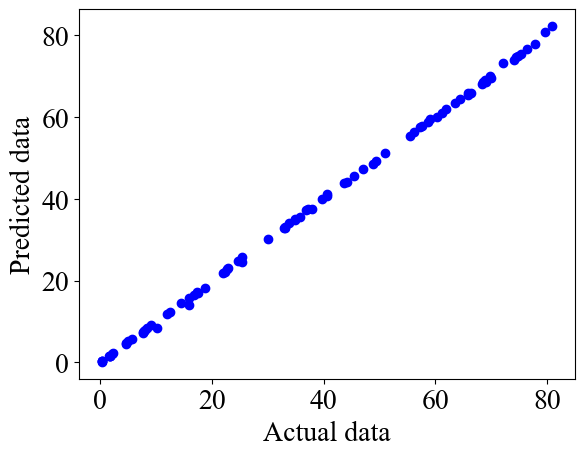

In [19]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, color="blue")
plt.xlabel ('Actual data')
plt.ylabel ('Predicted data')

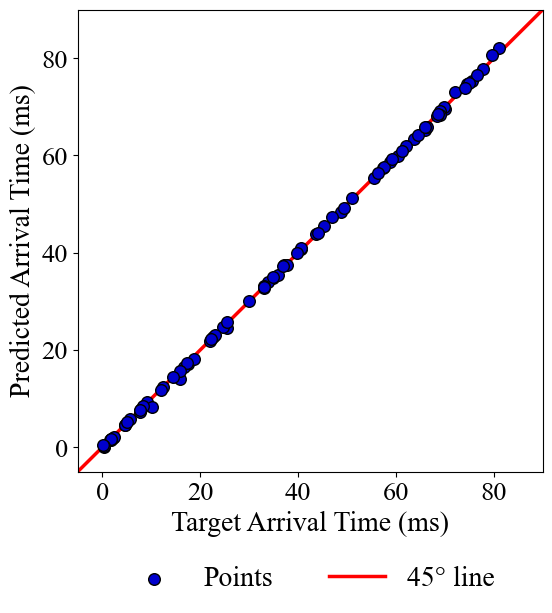

In [20]:
from sklearn.metrics import r2_score
# Initialize layout
fig1, ax1 = plt.subplots(figsize = (6, 6))

b_l = -5
u_l = 90

# Add scatterplot
ax1.scatter(y_test, y_pred, s=70, alpha=1, edgecolors="k",c='mediumblue',zorder=5, label = 'Points')


plt.ylabel('Predicted Arrival Time (ms)')
plt.xlabel('Target Arrival Time (ms)')
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)


x1 = np.linspace(b_l, u_l)

plt.plot(x1, x1, 'Red', label='45\N{DEGREE SIGN} line',lw=2.5,alpha=1)

plt.ylim(b_l, u_l)
plt.xlim(b_l, u_l)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4, frameon = False, fontsize = 20)

#plt.grid()

ax1.spines['left'].set_color('black')        # setting up Y-axis tick color to red
ax1.spines['bottom'].set_color('black')         #setting up above X-axis tick color to red

plt.savefig('Arrival_ANN5.png', dpi=200, bbox_inches='tight')

In [21]:
trainpreds = ann.predict(X_train)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train, trainpreds)) # train
print(mean_absolute_error(y_test, y_pred)) # test

13/13 [==============================] - 1s 39ms/step
0.22213218185144865
0.2673186950085039


In [22]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print (r2)

0.9997216034796016


In [23]:
r2_train = r2_score(y_train, trainpreds)
print (r2_train)

0.9998297134773176


In [24]:
count0 = 0
for i in range(len(y_pred)):
    line1 = y_pred[i] - 0.95*y_test[i]
    line2 = y_pred[i] - 1.05*y_test[i]
    mask0 = (line1 > 0) & (line2 < 0)
    count0 = np.sum(mask0+count0)

count1 = 0
for i in range(len(y_pred)):
    line1 = y_pred[i] - 0.9*y_test[i]
    line2 = y_pred[i] - 1.1*y_test[i]
    mask1 = (line1 > 0) & (line2 < 0)
    count1 = np.sum(mask1+count1)

count2 = 0
for j in range(len(y_pred)):
    line3 = y_pred[j] - 0.8*y_test[j]
    line4 = y_pred[j] - 1.2*y_test[j]
    mask2 = (line3 > 0) & (line4 < 0)
    count2 = np.sum(mask2+count2)


count3 = 0    
for k in range(len(y_pred)):
    line5 = y_pred[k] - 0.8*y_test[k]
    line6 = y_pred[k] - 1.2*y_test[k]
    mask3 = (line5 < 0) or (line6 > 0)
    count3 = np.sum(mask3+count3)
   

print ('Within 5% margin', format((count0/len (y_pred)),'.2%'))
print ('Within 10% margin', format((count1/len (y_pred)),'.2%'))
print ('Within 20% margin', format((count2/len (y_pred)),'.2%'))
print ('Out of 20% margin', format((count3/len (y_pred)),'.2%'))

Within 5% margin 86.21%
Within 10% margin 95.40%
Within 20% margin 97.70%
Out of 20% margin 2.30%


In [25]:
adj_r2 = 1 - ((1 - r2) * (len(X_test) - 1) / (len(X_test) - len (X_test[0]) - 1))
print (adj_r2)

0.9997149749910207


In [26]:
import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_test, y_pred))

0.42814966131270565

In [27]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

0.2673186950085039